## <center>Лабораторная работа №21-22</center>

**Тема:** Разработка, отладка и испытание программ для получения данных с одиночной страницы сайта

**Цель:** Получить навыки разработки, отладки и испытаний программ, выполняющих парсинг данных с одиночной страницы сайта с помощью модуля requests. 

**Материал:** [Лекция 5.2  Парсинг данных с одиночной страницы сайта](../../material/lectures/lect05_02.ipynb) 

**<center>Пример:</center>**

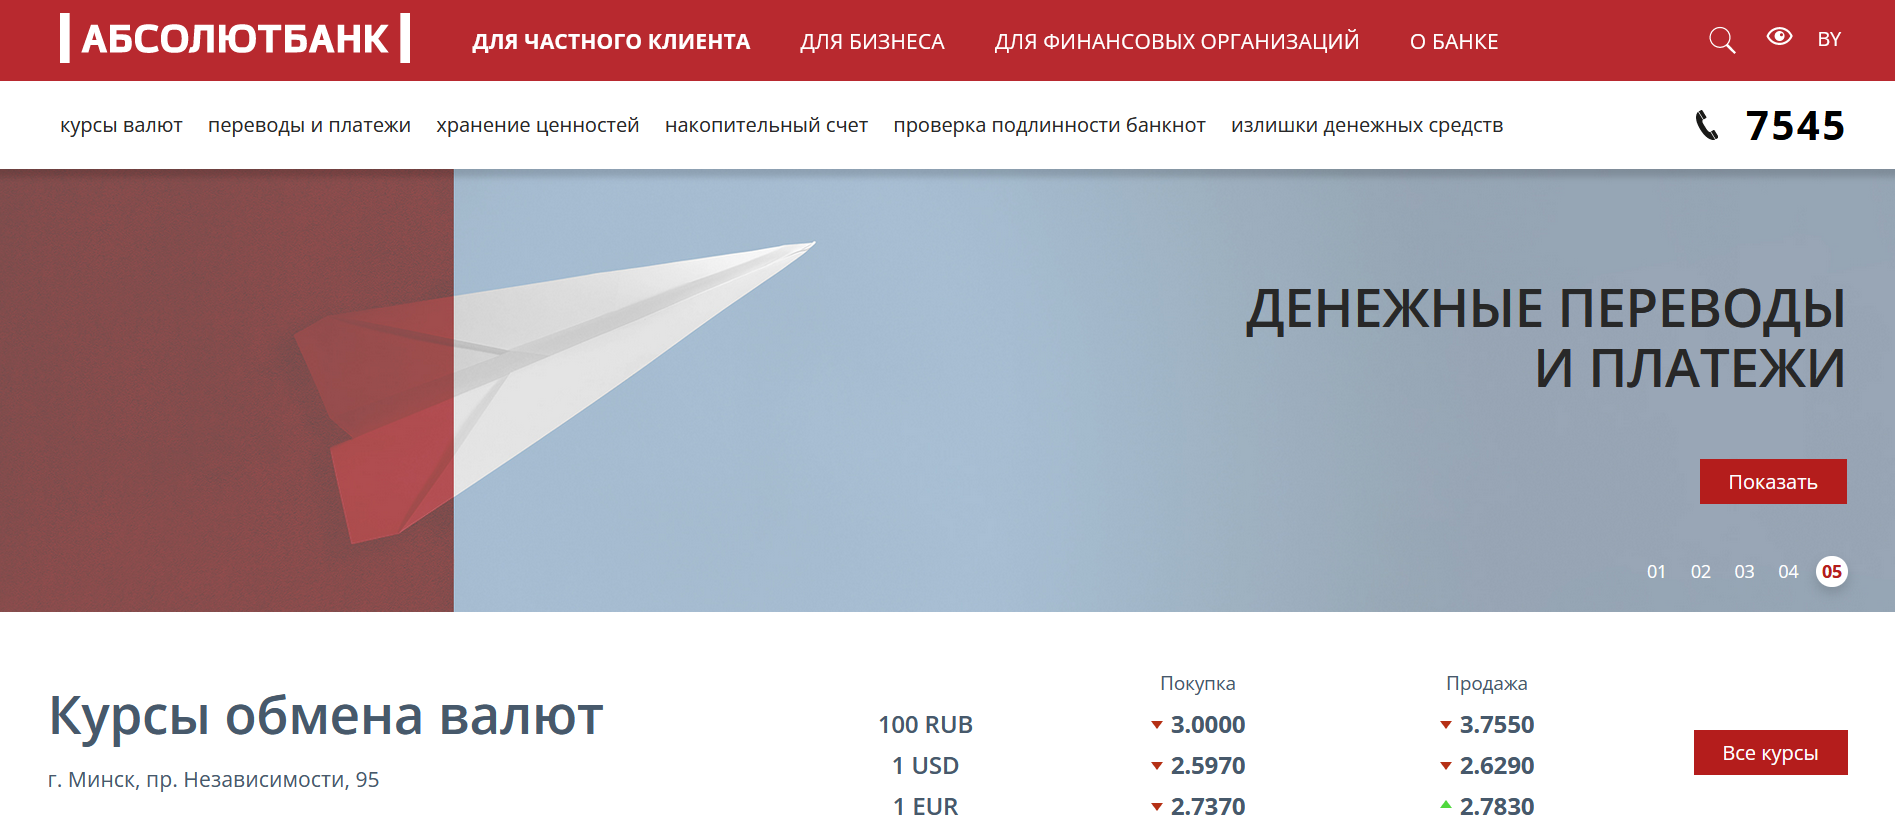
https://absolutbank.by/

#### Подключение необходимых библиотек

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

#### Получение контента

In [2]:
url = "https://absolutbank.by"

# Необходимый заголовок, имитирующий запрос от браузера
user_agent = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0'}

# Получение контента страницы
r = requests.get(url, headers = user_agent)
#print(r) # Статус ответа (Response [200] - норма)

#### Преобразование в дерево тегов

In [3]:
soup = BeautifulSoup(r.text,"html.parser")
#print(soup) # Просмотр дерева тегов

#### Выборка данных из дерева тегов

In [10]:
items = soup.find_all("tr")
items.pop(0)
#print(items)
curr = []
for i in range(0,3):
    ##print(items[i])
    temp = items[i].find_all("td")
    curr.append({
    'Валюта': temp[0].get_text(),
    'Покупка': temp[1].get_text().replace('.',','),
    'Продажа': temp[2].get_text().replace('.',',')
    })
print(curr)

[{'Валюта': '100 RUB', 'Покупка': '3,0000', 'Продажа': '3,8500'}, {'Валюта': '1 USD', 'Покупка': '2,5650', 'Продажа': '2,5850'}, {'Валюта': '1 EUR', 'Покупка': '2,7150', 'Продажа': '2,7400'}]


#### Запись в css-файл

In [12]:
with open('files/curr_bank.csv',"w") as file:
    writer = csv.DictWriter(
    file,
    fieldnames = ['Валюта','Покупка','Продажа'],
    delimiter = ';',
    lineterminator = '\r',
    quoting = csv.QUOTE_MINIMAL
    )
    writer.writeheader()
    for elem in curr:
        writer.writerow(elem)
print('Запись окончена')

Запись окончена


### Задание:
**Получите текущие курсы валют банка вашего варианта и сохраните их в csv-файл.**
# ------------------------------------------------
**1 вариант**
Альфа-Банк https://www.alfabank.by/

**2 вариант**
Банк БелВЭБ https://www.belveb.by/

**3 вариант**
Банк ВТБ (Беларусь) https://www.vtb.by/

**4 вариант**
Банк Дабрабыт https://bankdabrabyt.by/

**5 вариант**
Банк Решение https://rbank.by/

**6 вариант**
Белгазпромбанк https://belgazprombank.by/

**7 вариант**
Белинвестбанк https://www.belinvestbank.by/individual

**8 вариант**
БНБ-Банк https://bnb.by/

**9 вариант**
БСБ Банк https://www.bsb.by/

**10 ваиант**
МТБанк https://www.mtbank.by/

**11 вариант**
Паритетбанк https://www.paritetbank.by/private/

**12 вариант**
Приорбанк https://www.priorbank.by/

**13 вариант**
РРБ-Банк https://www.rrb.by/

**14 вариант**
Сбер Банк https://www.sber-bank.by/

**15 вариант**
Технобанк https://tb.by/individuals/



**Ваш вариант:**